In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier

from sklearn import metrics 
from collections import Counter
import matplotlib.pyplot as plt

from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler, NearMiss, TomekLinks, EditedNearestNeighbours

from sklearn.metrics import roc_curve, auc, precision_recall_curve, cohen_kappa_score
from sklearn import metrics
import time


In [2]:
data = df= pd.read_csv('encoded.csv')
X ,y = df.drop('isFraud', axis=1),df.isFraud
y = (y==1).astype(int)

In [3]:
from sklearn.model_selection import train_test_split
_, X_keep, _, y_keep = train_test_split(X, y, test_size=0.2)

In [4]:
def ordinary(X_train, X_test, y_train, y_test, model):
    DTC = model.fit(X_train, y_train)
    predictions = DTC.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, predictions)
    precision, recall, fscore, support =metrics.precision_recall_fscore_support(y_test, predictions)
    tn, fp, fn, tp = metrics.confusion_matrix(y_test, predictions).ravel()
    
    
    
    fpr, tpr, thresholds =roc_curve(y_test, predictions, pos_label=1)
    
    
    auc = metrics.auc(fpr, tpr)
    
    #y_pred_test_prob = grid.predict_proba(X_test)
    
    results['ordinary'] = {'accuracy': accuracy, 'precision': precision, 'recall': recall, 
                          'fscore': fscore, 'n_occurences': support,
                          'predictions_count': Counter(predictions),
                          'tp': tp, 'tn': tn, 'fp': fp, 'fn': fn,
                          'auc': auc}
    
    print("F1: ", metrics.f1_score(y_test, predictions))
    print("Cohen Kappa: ", metrics.cohen_kappa_score(y_test, predictions))
    print("Brier: ", metrics.brier_score_loss(y_test, predictions))
    #print("LogLoss: ", metrics.log_loss(y_test, y_pred_test_prob))
    print(metrics.classification_report(y_test, predictions))
    conf_matrix = metrics.confusion_matrix(y_test, predictions)
    
    import matplotlib.pyplot as plt
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.matshow(conf_matrix, alpha=0.3,cmap=plt.cm.gray_r)
    for i in range(conf_matrix.shape[0]):
        for j in range(conf_matrix.shape[1]):
            ax.text(x=j, y=i, s=conf_matrix[i, j], va='center', ha='center', fontsize=24,color ='k')
            plt.title('Confusion Matrix ', size=20)
    plt.xlabel('Predicted label', size=20)
    plt.ylabel('True label', size=20)
    ax.tick_params('x', labelsize = 20)
    ax.tick_params('y', labelsize = 20)
    plt.tight_layout()
    plt.show()
    

    
    fig1, ax1 = plt.subplots(figsize=(8, 8))
    #fpr, tpr, thresholds = roc_curve(y_test, y_pred_test_prob[:, 1])
    roc_auc = metrics.auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=1, label='Model Performance (area = %0.2f)' % (roc_auc))
    plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Luck')
    
    plt.plot([0, 0, 1], [0, 1, 1], lw=2,linestyle=':',color='black',label='Perfect Performance')
    plt.xlim([-0.02, 1.02])
    plt.ylim([-0.02, 1.02])
    plt.xlabel('False Positive Rate', size=20)
    plt.ylabel('True Positive Rate', size=20)
    plt.title('Receiver Operating Characteristic', size=20)
    plt.xticks(size = 20)
    plt.yticks(size = 20)
    plt.legend(loc="lower right", fontsize=18)
    

In [5]:

def class_weight(X_train, X_test, y_train, y_test, model):
    
    model.set_params(class_weight='balanced')
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, predictions)
    precision, recall, fscore, support = metrics.precision_recall_fscore_support(y_test, predictions)
    tn, fp, fn, tp = metrics.confusion_matrix(y_test, predictions).ravel()
    fpr, tpr, thresholds = metrics.roc_curve(y_test, predictions, pos_label=1)
    auc = metrics.auc(fpr, tpr)

    results['class_weight'] = {'accuracy': accuracy, 'precision': precision, 'recall': recall, 
                                  'fscore': fscore, 'n_occurences': support,
                                  'predictions_count': Counter(predictions),
                                  'tp': tp, 'tn': tn, 'fp': fp, 'fn': fn,
                                  'auc': auc}
    
    print("F1: ", metrics.f1_score(y_test, predictions))
    print("Cohen Kappa: ", metrics.cohen_kappa_score(y_test, predictions))
    print("Brier: ", metrics.brier_score_loss(y_test, predictions))
    #print("LogLoss: ", metrics.log_loss(y_test, y_pred_test_prob))
    print(metrics.classification_report(y_test, predictions))
    conf_matrix = metrics.confusion_matrix(y_test, predictions)
    
    import matplotlib.pyplot as plt
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.matshow(conf_matrix, alpha=0.3,cmap=plt.cm.gray_r)
    for i in range(conf_matrix.shape[0]):
        for j in range(conf_matrix.shape[1]):
            ax.text(x=j, y=i, s=conf_matrix[i, j], va='center', ha='center', fontsize=24,color ='k')
            plt.title('Confusion Matrix ', size=20)
    plt.xlabel('Predicted label', size=20)
    plt.ylabel('True label', size=20)
    ax.tick_params('x', labelsize = 20)
    ax.tick_params('y', labelsize = 20)
    plt.tight_layout()
    plt.show()
    

    
    fig1, ax1 = plt.subplots(figsize=(8, 8))
    #fpr, tpr, thresholds = roc_curve(y_test, y_pred_test_prob[:, 1])
    roc_auc = metrics.auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=1, label='Model Performance (area = %0.2f)' % (roc_auc))
    plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Luck')
    
    plt.plot([0, 0, 1], [0, 1, 1], lw=2,linestyle=':',color='black',label='Perfect Performance')
    plt.xlim([-0.02, 1.02])
    plt.ylim([-0.02, 1.02])
    plt.xlabel('False Positive Rate', size=20)
    plt.ylabel('True Positive Rate', size=20)
    plt.title('Receiver Operating Characteristic', size=20)
    plt.xticks(size = 20)
    plt.yticks(size = 20)
    plt.legend(loc="lower right", fontsize=18)
    

In [6]:
def Oversampling(X_train, X_test, y_train, y_test, model, sampler):
    print(f'Before resampling: {sorted(Counter(y_train).items())}')
    X_resampled, y_resampled = sampler.fit_sample(X_train, y_train)
    print(f'After resampling: {sorted(Counter(y_resampled).items())}')
        
    model.fit(X_resampled, y_resampled)
    predictions = model.predict(X_test)
        
    accuracy = metrics.accuracy_score(y_test, predictions)
    precision, recall, fscore, support = metrics.precision_recall_fscore_support(y_test, predictions)
    tn, fp, fn, tp = metrics.confusion_matrix(y_test, predictions).ravel()
    fpr, tpr, thresholds = metrics.roc_curve(y_test, predictions, pos_label=1)
    auc = metrics.auc(fpr, tpr)

    results['oversample'] = {'accuracy': accuracy, 
                                            'precision': precision, 
                                            'recall': recall,
                                            'fscore': fscore, 
                                            'n_occurences': support,
                                            'predictions_count': Counter(predictions),
                                            'tp': tp, 'tn': tn, 'fp': fp, 'fn': fn,
                                            'auc': auc
                                            }
    print("F1: ", metrics.f1_score(y_test, predictions))
    print("Cohen Kappa: ", metrics.cohen_kappa_score(y_test, predictions))
    print("Brier: ", metrics.brier_score_loss(y_test, predictions))
    #print("LogLoss: ", metrics.log_loss(y_test, y_pred_test_prob))
    print(metrics.classification_report(y_test, predictions))
    conf_matrix = metrics.confusion_matrix(y_test, predictions)
    
    import matplotlib.pyplot as plt
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.matshow(conf_matrix, alpha=0.3,cmap=plt.cm.gray_r)
    for i in range(conf_matrix.shape[0]):
        for j in range(conf_matrix.shape[1]):
            ax.text(x=j, y=i, s=conf_matrix[i, j], va='center', ha='center', fontsize=24,color ='k')
            plt.title('Confusion Matrix ', size=20)
    plt.xlabel('Predicted label', size=20)
    plt.ylabel('True label', size=20)
    ax.tick_params('x', labelsize = 20)
    ax.tick_params('y', labelsize = 20)
    plt.tight_layout()
    plt.show()
    

    
    fig1, ax1 = plt.subplots(figsize=(8, 8))
    #fpr, tpr, thresholds = roc_curve(y_test, y_pred_test_prob[:, 1])
    roc_auc = metrics.auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=1, label='Model Performance (area = %0.2f)' % (roc_auc))
    plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Luck')
    
    plt.plot([0, 0, 1], [0, 1, 1], lw=2,linestyle=':',color='black',label='Perfect Performance')
    plt.xlim([-0.02, 1.02])
    plt.ylim([-0.02, 1.02])
    plt.xlabel('False Positive Rate', size=20)
    plt.ylabel('True Positive Rate', size=20)
    plt.title('Receiver Operating Characteristic', size=20)
    plt.xticks(size = 20)
    plt.yticks(size = 20)
    plt.legend(loc="lower right", fontsize=18)
    

In [7]:
def Undersampling(X_train, X_test, y_train, y_test, model,sampler):
    if sampler == 'NearMiss': sampler+=str(sampler.version)
    print(f'Technique: {sampler}')
    print(f'Before resampling: {sorted(Counter(y_train).items())}')
    X_resampled, y_resampled = sampler.fit_sample(X_train, y_train)
    print(f'After resampling: {sorted(Counter(y_resampled).items())}')

    model.fit(X_resampled, y_resampled)
    predictions = model.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, predictions)
    precision, recall, fscore, support = metrics.precision_recall_fscore_support(y_test, predictions)
    tn, fp, fn, tp = metrics.confusion_matrix(y_test, predictions).ravel()
    
    fpr, tpr, thresholds = metrics.roc_curve(y_test, predictions, pos_label=1)
    
    print(fpr, tpr)
    
    auc = metrics.auc(fpr, tpr)
    

    results['undersample'] = {'accuracy': accuracy, 
                                            'precision': precision, 
                                            'recall': recall,
                                            'fscore': fscore, 
                                            'n_occurences': support,
                                            'predictions_count': Counter(predictions),
                                            'tp': tp, 'tn': tn, 'fp': fp, 'fn': fn,
                                            'auc': auc}
    print("F1: ", metrics.f1_score(y_test, predictions))
    print("Cohen Kappa: ", metrics.cohen_kappa_score(y_test, predictions))
    print("Brier: ", metrics.brier_score_loss(y_test, predictions))
    #print("LogLoss: ", metrics.log_loss(y_test, y_pred_test_prob))
    print(metrics.classification_report(y_test, predictions))
    conf_matrix = metrics.confusion_matrix(y_test, predictions)
    
    import matplotlib.pyplot as plt
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.matshow(conf_matrix, alpha=0.3,cmap=plt.cm.gray_r)
    for i in range(conf_matrix.shape[0]):
        for j in range(conf_matrix.shape[1]):
            ax.text(x=j, y=i, s=conf_matrix[i, j], va='center', ha='center', fontsize=24,color ='k')
            plt.title('Confusion Matrix ', size=20)
    plt.xlabel('Predicted label', size=20)
    plt.ylabel('True label', size=20)
    ax.tick_params('x', labelsize = 20)
    ax.tick_params('y', labelsize = 20)
    plt.tight_layout()
    plt.show()
    

    
    fig1, ax1 = plt.subplots(figsize=(8, 8))
    #fpr, tpr, thresholds = roc_curve(y_test, y_pred_test_prob[:, 1])
    roc_auc = metrics.auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=1, label='Model Performance (area = %0.2f)' % (roc_auc))
    plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Luck')
    
    plt.plot([0, 0, 1], [0, 1, 1], lw=2,linestyle=':',color='black',label='Perfect Performance')
    plt.xlim([-0.02, 1.02])
    plt.ylim([-0.02, 1.02])
    plt.xlabel('False Positive Rate', size=20)
    plt.ylabel('True Positive Rate', size=20)
    plt.title('Receiver Operating Characteristic', size=20)
    plt.xticks(size = 20)
    plt.yticks(size = 20)
    plt.legend(loc="lower right", fontsize=18)

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_keep, y_keep, stratify=y_keep, test_size=0.2)

In [9]:


results = {'ordinary': {},
           'class_weight': {},
           'oversample': {},
           'undersample': {}}

In [10]:
techniques = [RandomOverSampler(),
              SMOTE(),
              ADASYN(),
              RandomUnderSampler(),
              NearMiss(version=2),
              TomekLinks(),
              EditedNearestNeighbours()]

In [11]:
model = DecisionTreeClassifier()

## DecisionTreeClassifier

F1:  0.82642089093702
Cohen Kappa:  0.826198935310585
Brier:  0.0004439991355769042
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    254167
           1       0.86      0.80      0.83       338

   micro avg       1.00      1.00      1.00    254505
   macro avg       0.93      0.90      0.91    254505
weighted avg       1.00      1.00      1.00    254505



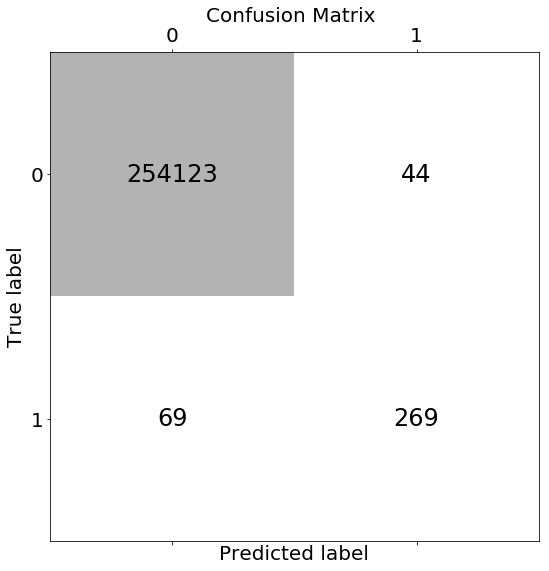

{'accuracy': 0.9995560008644231,
 'precision': array([0.99972855, 0.85942492]),
 'recall': array([0.99982689, 0.79585799]),
 'fscore': array([0.99977772, 0.82642089]),
 'n_occurences': array([254167,    338], dtype=int64),
 'predictions_count': Counter({0: 254192, 1: 313}),
 'tp': 269,
 'tn': 254123,
 'fp': 44,
 'fn': 69,
 'auc': 0.8978424368193088}

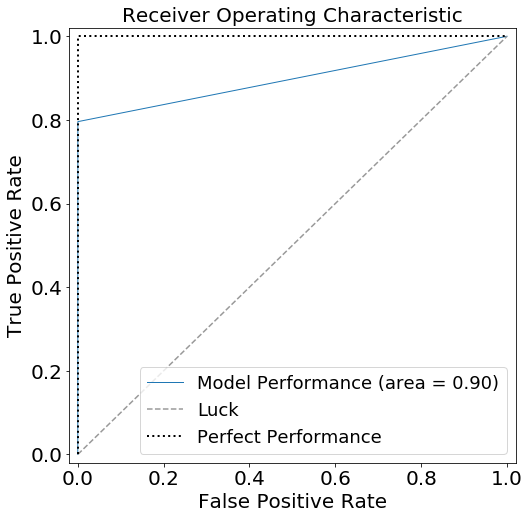

In [12]:
ordinary(X_train, X_test, y_train, y_test, model)
results['ordinary']

F1:  0.7893915756630266
Cohen Kappa:  0.7891268132459234
Brier:  0.0005304414451582484
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    254167
           1       0.83      0.75      0.79       338

   micro avg       1.00      1.00      1.00    254505
   macro avg       0.92      0.87      0.89    254505
weighted avg       1.00      1.00      1.00    254505



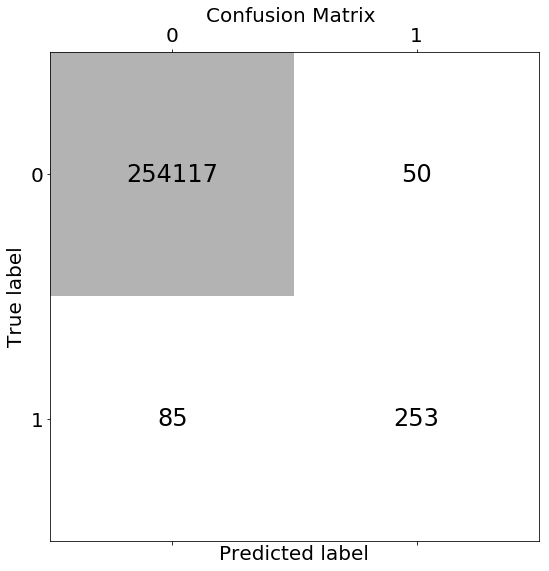

{'accuracy': 0.9994695585548418,
 'precision': array([0.99966562, 0.8349835 ]),
 'recall': array([0.99980328, 0.74852071]),
 'fscore': array([0.99973444, 0.78939158]),
 'n_occurences': array([254167,    338], dtype=int64),
 'predictions_count': Counter({0: 254202, 1: 303}),
 'tp': 253,
 'tn': 254117,
 'fp': 50,
 'fn': 85,
 'auc': 0.8741619945028455}

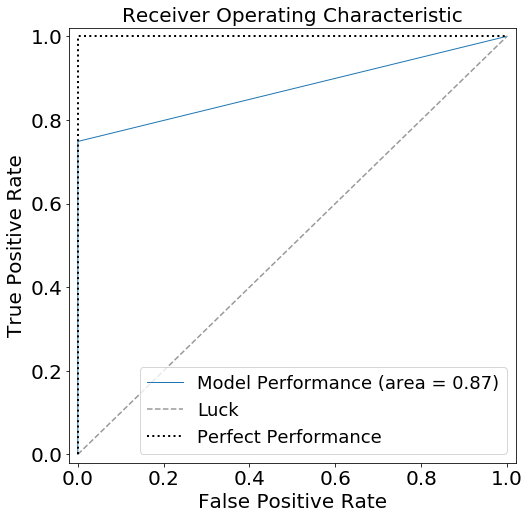

In [13]:
class_weight(X_train, X_test, y_train, y_test, model)
results['class_weight']

Before resampling: [(0, 1016665), (1, 1354)]
After resampling: [(0, 1016665), (1, 1016665)]
F1:  0.792393026941363
Cohen Kappa:  0.7921366573299633
Brier:  0.000514724661598004
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    254167
           1       0.85      0.74      0.79       338

   micro avg       1.00      1.00      1.00    254505
   macro avg       0.93      0.87      0.90    254505
weighted avg       1.00      1.00      1.00    254505



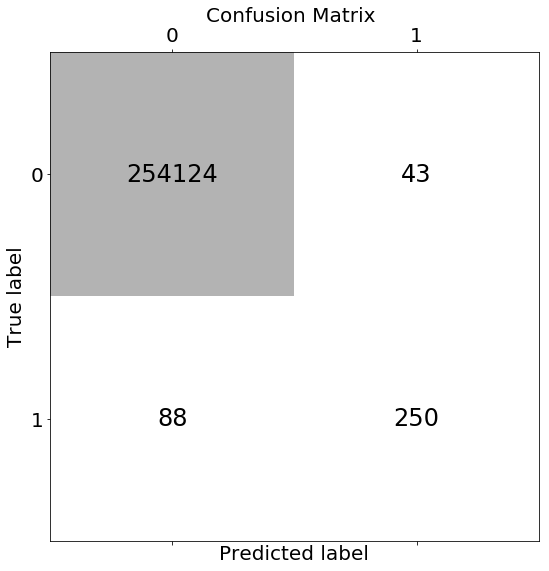

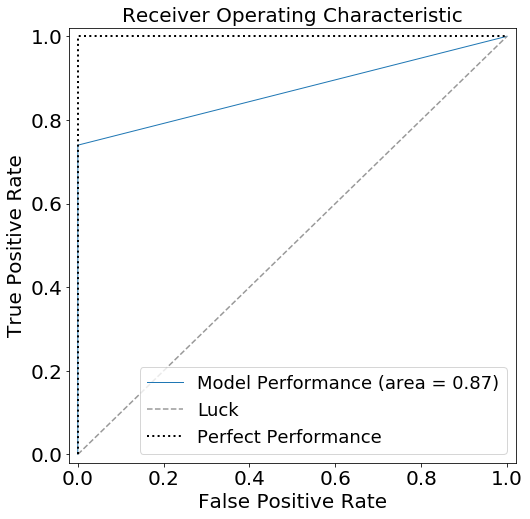

In [14]:
Oversampling(X_train, X_test, y_train, y_test, model,techniques[0]) 


Before resampling: [(0, 1016665), (1, 1354)]
After resampling: [(0, 1016665), (1, 1016665)]
F1:  0.708235294117647
Cohen Kappa:  0.7077677424984907
Brier:  0.0009744405807351526
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    254167
           1       0.59      0.89      0.71       338

   micro avg       1.00      1.00      1.00    254505
   macro avg       0.79      0.94      0.85    254505
weighted avg       1.00      1.00      1.00    254505



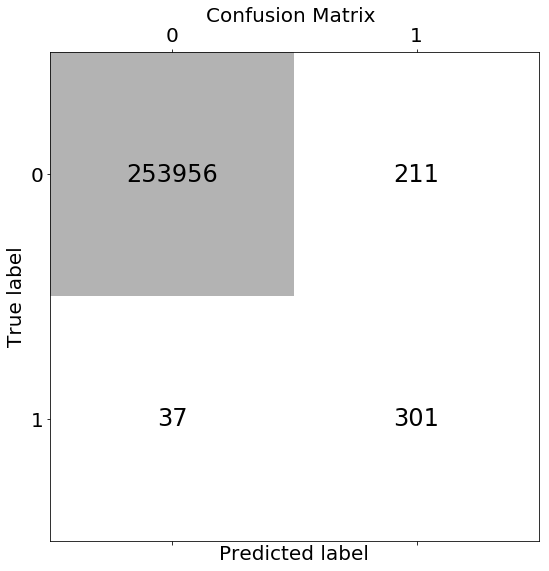

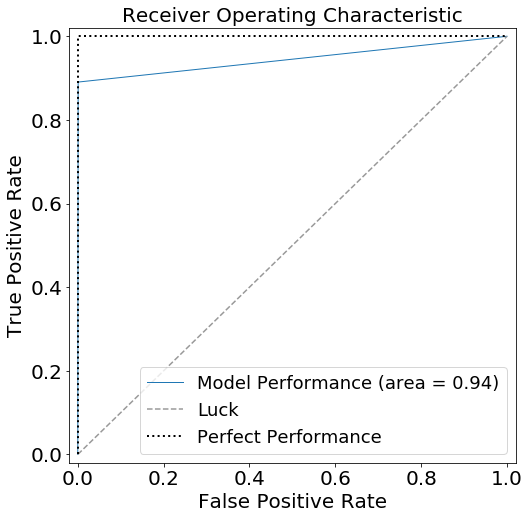

In [15]:
Oversampling(X_train, X_test, y_train, y_test, model,techniques[1])


Before resampling: [(0, 1016665), (1, 1354)]
After resampling: [(0, 1016665), (1, 1016538)]
F1:  0.7065868263473054
Cohen Kappa:  0.7061222179619691
Brier:  0.0009626529930649693
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    254167
           1       0.59      0.87      0.71       338

   micro avg       1.00      1.00      1.00    254505
   macro avg       0.80      0.94      0.85    254505
weighted avg       1.00      1.00      1.00    254505



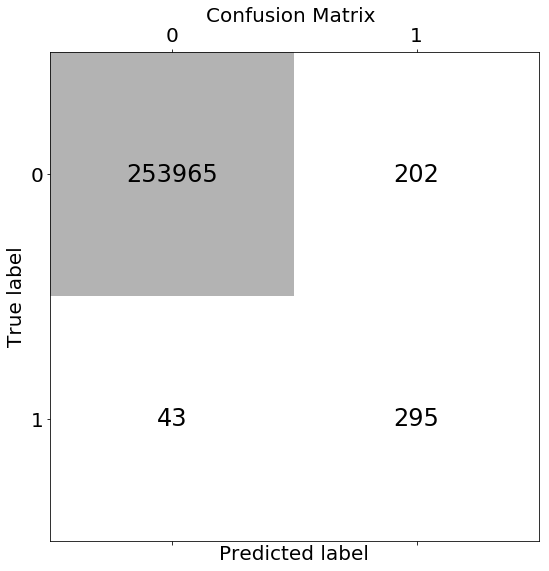

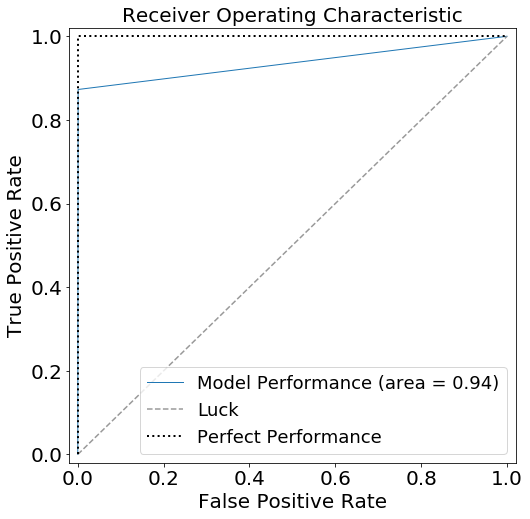

In [16]:
Oversampling(X_train, X_test, y_train, y_test, model,techniques[2])

Technique: RandomUnderSampler(random_state=None, ratio=None, replacement=False,
          return_indices=False, sampling_strategy='auto')
Before resampling: [(0, 1016665), (1, 1354)]
After resampling: [(0, 1354), (1, 1354)]
[0.         0.02281177 1.        ] [0.         0.97928994 1.        ]
F1:  0.10236585743002938
Cohen Kappa:  0.10010052921690782
Brier:  0.02280898214180468
              precision    recall  f1-score   support

           0       1.00      0.98      0.99    254167
           1       0.05      0.98      0.10       338

   micro avg       0.98      0.98      0.98    254505
   macro avg       0.53      0.98      0.55    254505
weighted avg       1.00      0.98      0.99    254505



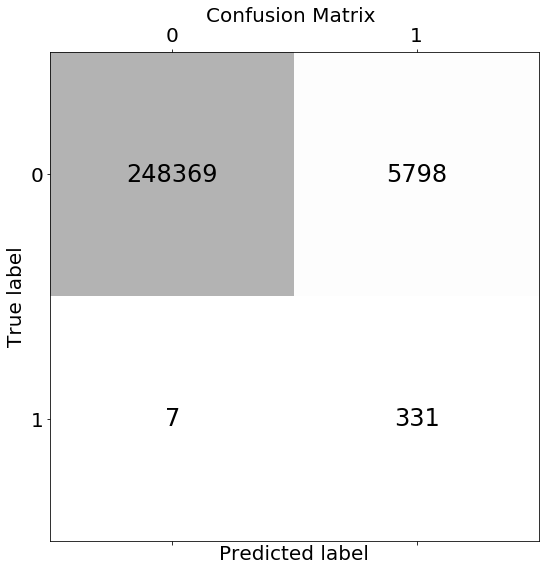

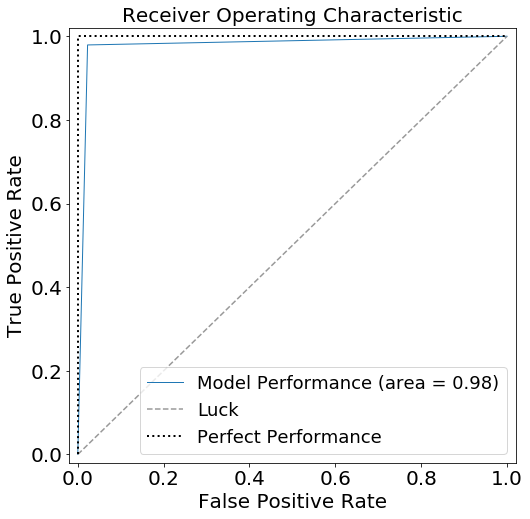

In [17]:
Undersampling(X_train, X_test, y_train, y_test, model,techniques[3])

Technique: NearMiss(n_jobs=1, n_neighbors=3, n_neighbors_ver3=3, random_state=None,
     ratio=None, return_indices=False, sampling_strategy='auto', version=1)
Before resampling: [(0, 1016665), (1, 1354)]
After resampling: [(0, 1354), (1, 1354)]
[0.         0.59178808 1.        ] [0. 1. 1.]
F1:  0.004474184090172017
Cohen Kappa:  0.0018288364623013642
Brier:  0.5910021414117601
              precision    recall  f1-score   support

           0       1.00      0.41      0.58    254167
           1       0.00      1.00      0.00       338

   micro avg       0.41      0.41      0.41    254505
   macro avg       0.50      0.70      0.29    254505
weighted avg       1.00      0.41      0.58    254505



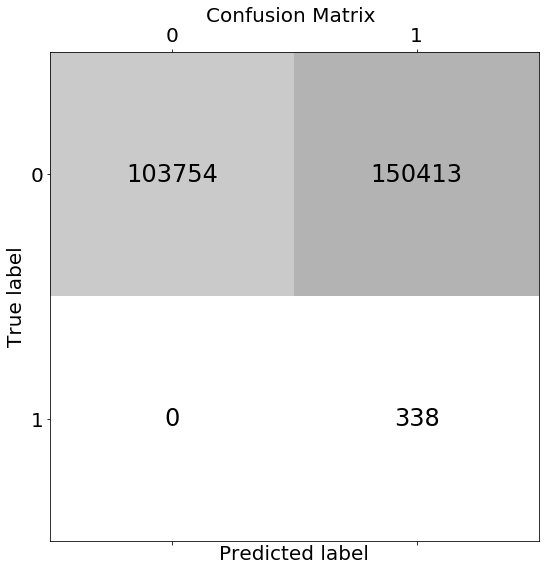

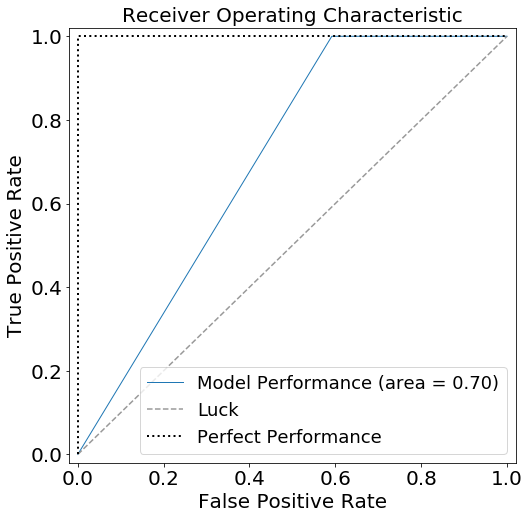

In [18]:
Undersampling(X_train, X_test, y_train, y_test, model,techniques[4])

Technique: TomekLinks(n_jobs=1, random_state=None, ratio=None, return_indices=False,
      sampling_strategy='auto')
Before resampling: [(0, 1016665), (1, 1354)]
After resampling: [(0, 1016419), (1, 1354)]
[0.00000000e+00 2.12458738e-04 1.00000000e+00] [0.         0.73076923 1.        ]
F1:  0.7730829420970265
Cohen Kappa:  0.7727986748166243
Brier:  0.0005697334040588594
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    254167
           1       0.82      0.73      0.77       338

   micro avg       1.00      1.00      1.00    254505
   macro avg       0.91      0.87      0.89    254505
weighted avg       1.00      1.00      1.00    254505



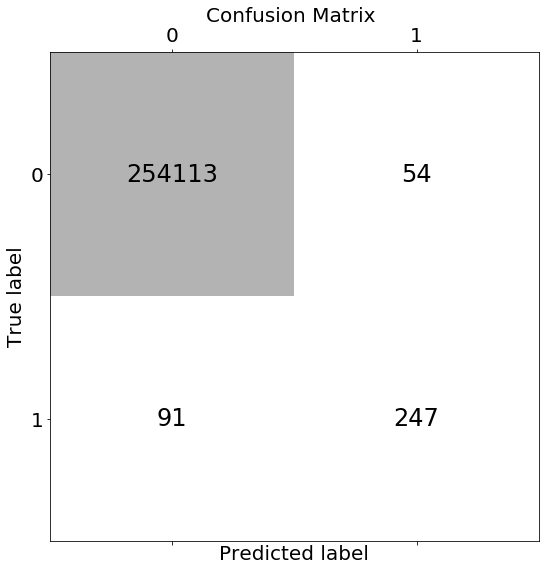

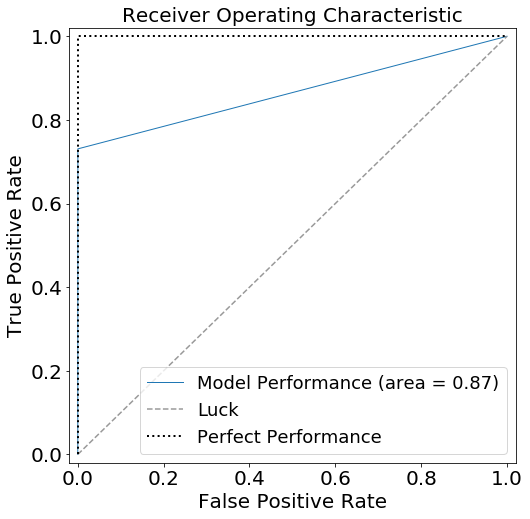

In [20]:
Undersampling(X_train, X_test, y_train, y_test, model,techniques[6])

Technique: EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
            random_state=None, ratio=None, return_indices=False,
            sampling_strategy='auto')
Before resampling: [(0, 1016665), (1, 1354)]
After resampling: [(0, 1015563), (1, 1354)]
[0.00000000e+00 2.12458738e-04 1.00000000e+00] [0.         0.75147929 1.        ]
F1:  0.7863777089783281
Cohen Kappa:  0.7861068361265369
Brier:  0.0005422290328284317
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    254167
           1       0.82      0.75      0.79       338

   micro avg       1.00      1.00      1.00    254505
   macro avg       0.91      0.88      0.89    254505
weighted avg       1.00      1.00      1.00    254505



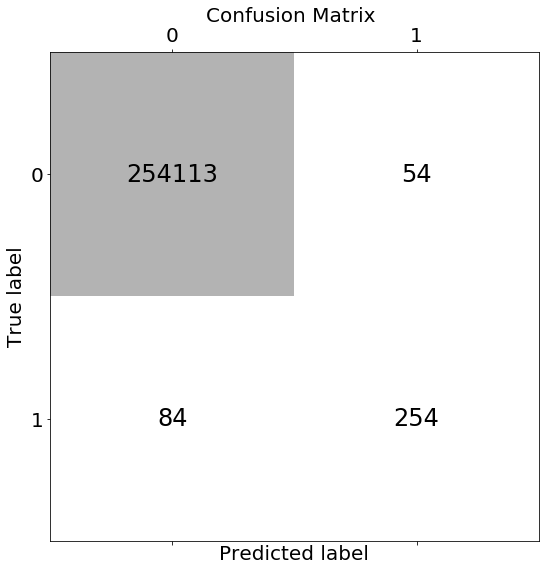

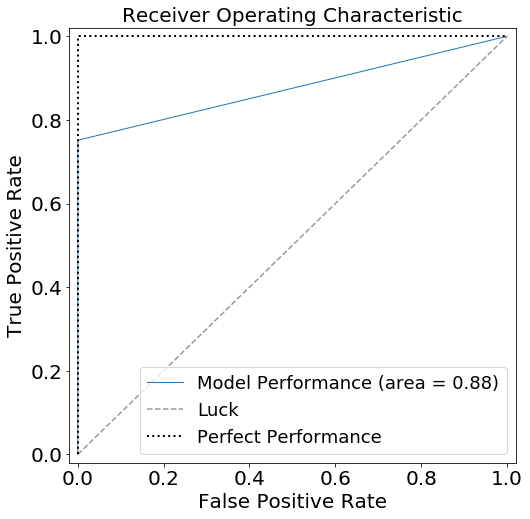

In [21]:
Undersampling(X_train, X_test, y_train, y_test, model,techniques[7])

In [1]:
#Nearmiss
#Undersampling(X_train, X_test, y_train, y_test, model,techniques[5])